In [1]:
from sklearn import metrics

import os
import pandas as pd
import numpy as np
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
class Image:
  """
    This class will be used for mantaining informations about an image
  """
  def __init__(self, category_name):

    # Name of person
    self.category_name = category_name

    # A list with images of the person
    self.category_images = []
  
  def getCategoryName(self):
    return self.category_name

  def getCategoryImages(self):
    return self.category_images
  
  def addImage(self, image):
    """
      This function is used for adding an image with person to his/her list

      Arguments:
        image: the image we want to add (numpy array)
    """
    self.category_images.append(image)

def testImageClass():
  """
    This function is used for testing the Image class
  """
  img = Image("Highway")

  assert img.getCategoryName() == "Highway"
  assert img.getCategoryName() != "awd"
  assert len(img.getCategoryImages()) == 0

  img.addImage(3)
  assert len(img.getCategoryImages()) == 1

testImageClass()

class RepositoryImages:
  """
    This class will be used for storing the images
  """
  def __init__(self):

    # A dictionary in this form {category: Image(category, category_images) }
    self.images = {}

  def getAllImages(self):
    """
      This function is used for getting all images 

      Return:
        A list with all images from dict that contains Image objects
    """
    return list(self.images.values())
  
  def find(self, category):
    """
      This function is used for getting the images of a category

      Arguments:
        category: a string which represents the name of the category that we want to find
      
      Return:
        A object Image
    """
    return self.images[category]
  
  def read(self, path_to_dataset):
    """
      This function is used for reading the images from directories

      Arguments:
        path_to_dataset: the path where the images are stored
    """
    directories = os.listdir(path_to_dataset)

    self.images = {}
    print("Total directories: " +str(len(directories)))

    # Iterate thorugh directories of path_to_dataset directory
    for directory in directories:

      # Get the name of each directory
      name_of_images = os.listdir(path_to_dataset + directory)
      print("Current directory: " + directory + " " + str(len(name_of_images)))

      # Iterate through images
      for name_of_image in name_of_images:

        # If the image is already in dictionary
        if directory in self.images.keys():

          # Read the image
          image = cv2.imread(path_to_dataset + directory + "/" + name_of_image)

          # Add new image 
          self.images[directory].addImage(image)

        else:
          # Read the image
          image = Image(directory)
          image.addImage(cv2.imread(path_to_dataset + directory + "/" + name_of_image))
          self.images[directory] = image

def testRepository():
  assert len(repo.getAllImages()) == 10

In [3]:

repository = RepositoryImages()
repository.read("/Users/hewanshrestha/Documents/HLCV/project/Why-Self-Supervision-in-Time/data/2750/")

Total directories: 10
Current directory: Forest 3000
Current directory: River 2500
Current directory: Highway 2500
Current directory: AnnualCrop 3000
Current directory: SeaLake 3000
Current directory: HerbaceousVegetation 3000
Current directory: Industrial 2500
Current directory: Residential 3000
Current directory: PermanentCrop 2500
Current directory: Pasture 2000


In [4]:
class Service:
  """
    This class will be used for working with the while database of images
  """
  def __init__(self, repo):
    self.repo = repo
  
  def getAllImages(self):
    """
      This function is used for getting all images

      Return:
        A list with all images
    """
    return self.repo.getAllImages()

  def find(self, name_category):
    """
      This function is used for getting the images of a category

      Arguments:
        name_category: a string which represents the name of the category that we want to find
      
      Return:
        A object Image
    """
    return self.repo.find(name_category)
  
  def make_flat(self,input_list):
    """
      input_list: a list of lists
    """
    flat_list = []
    for sublist in input_list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

  
  def displayImagesOfCategory(self, name_category):
    """
      This function is used for displaying the images of a category

      Arguments:
        name_category: a string which represents the name of a category that we want to see his/her images
    """
    # Define the dimensions of the plot grid 
    list_of_images = self.find(name_category).getCategoryImages()
    dim = math.floor(math.sqrt(len(list_of_images[:100])))
    W_grid = dim
    L_grid = dim

    # fig, axes = plt.subplots(L_grid, W_grid)
    # subplot return the figure object and axes object
    # we can use the axes object to plot specific figures at various locations

    fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

    axes = axes.ravel() 

    index = 0
    for i in np.arange(0, W_grid * L_grid):

        # read and display an image with the selected index    
        axes[i].imshow(cv2.cvtColor(np.uint8(list_of_images[index]), cv2.COLOR_BGR2RGB))
        axes[i].set_title(name_category + "_" + str(i), fontsize = 10)
        index+=1
        axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)
  
  def displayFrequencyHistogram(self):
    """
      This function is used to show a histogram of image frequency for each category
    """

    # Get all images
    images = self.getAllImages()
    
    frequency = [] # the number of images that corresponds to each category
    categories = [] # the name of each category

    # Iterate through images
    for image in images:
      frequency.append(len(image.getCategoryImages()))
      categories.append(image.getCategoryName())

    fig = go.Figure(data=[go.Bar(x = categories, y = frequency)])  

    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',marker_line_width=1.5, opacity=0.6)
    fig.update_layout(title_text = "Image frequency on each category")

    fig.show()
  
  def get_data_frame_of_frequency(self):
    """
      This function is used for getting the distribution of the dataset

      Return:
        A dataframe
    """
    # The rows for dataframe
    rows = []

    # Get images
    images = self.getAllImages()
    
    frequency = [] # the number of images that corresponds to each category
    categories = [] # the name of each category

    # Iterate through images
    for image in images:
      frequency.append(len(image.getCategoryImages()))
      categories.append(image.getCategoryName())
    
    total_images = sum(frequency)

    for i in range(len(categories)):
      category = categories[i]
      number_images_category = frequency[i]

      percent = round((number_images_category * 100) / total_images, 2)

      row = [category, number_images_category, percent, total_images]
      rows.append(row)

    df = pd.DataFrame(data = rows, columns=["Category", "Number of images", "Percent", "Total images"])
    return df


In [5]:
service = Service(repository)


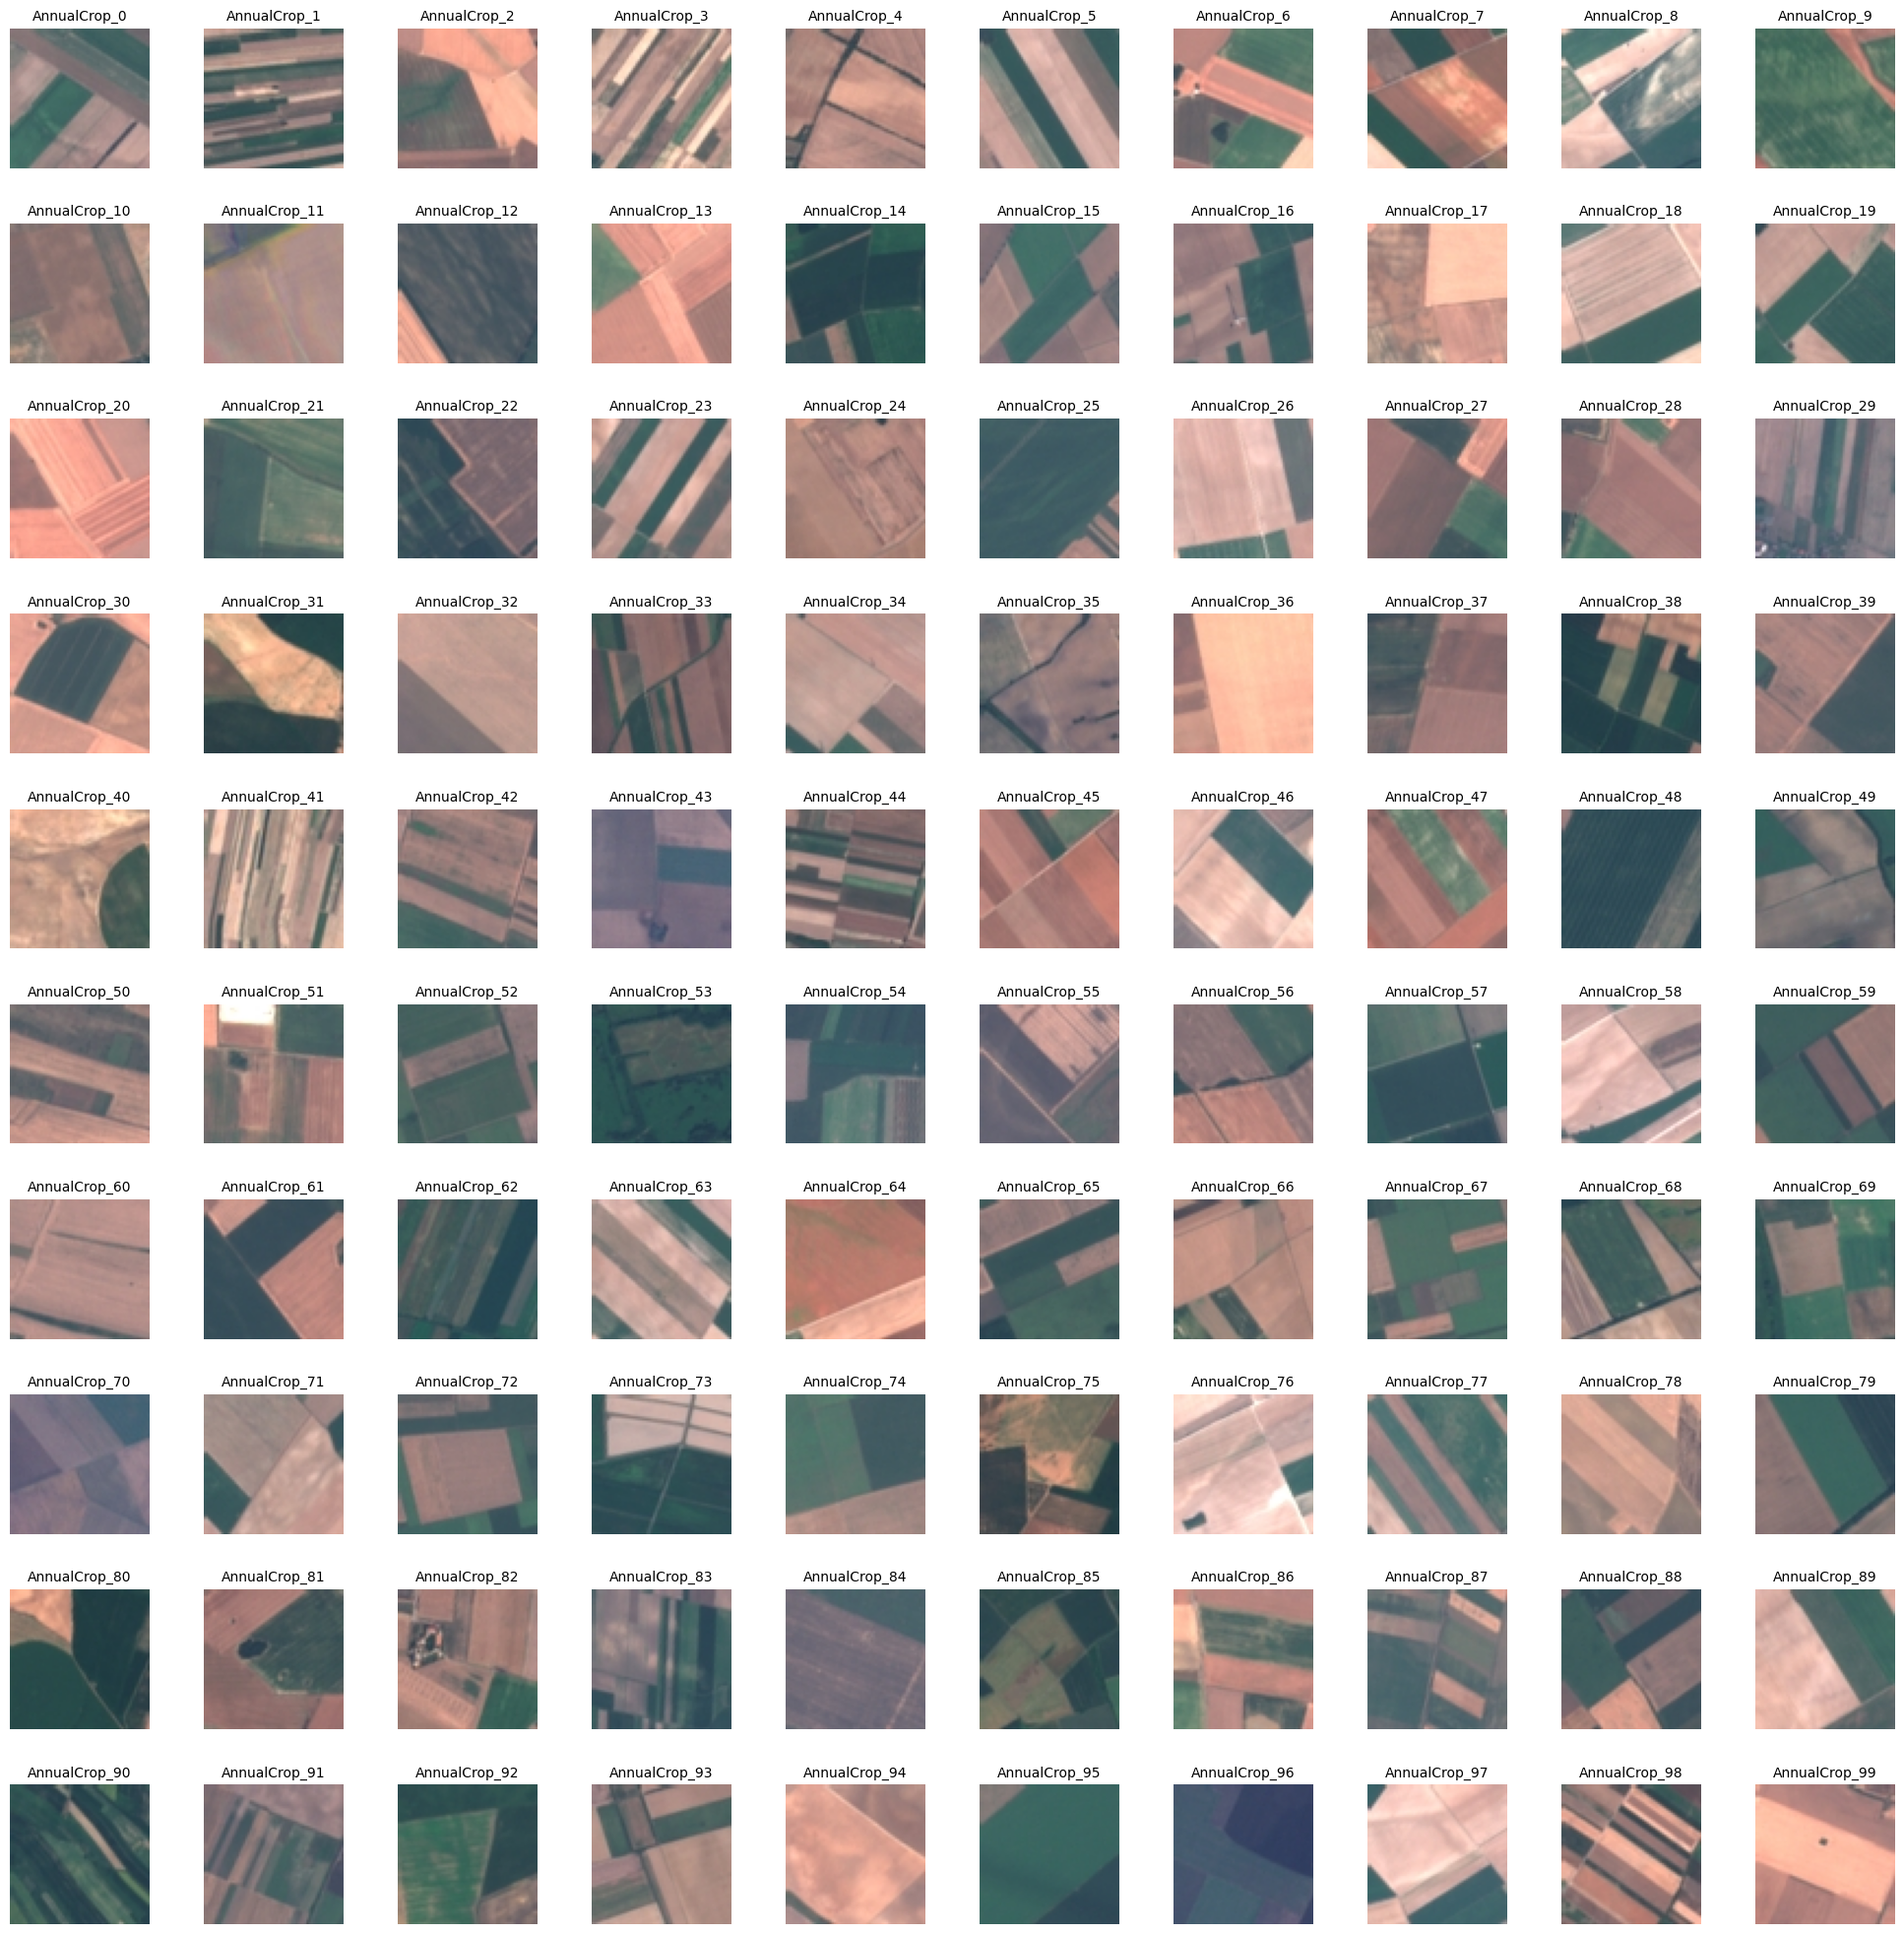

In [6]:
service.displayImagesOfCategory("AnnualCrop")


In [7]:
service.displayFrequencyHistogram()


In [8]:
df = service.get_data_frame_of_frequency()


In [9]:
df.sort_values(by="Percent", ignore_index=True)


,Category,Number of images,Percent,Total images
0,Pasture,2000,7.41,27000
1,River,2500,9.26,27000
2,Highway,2500,9.26,27000
3,Industrial,2500,9.26,27000
4,PermanentCrop,2500,9.26,27000
5,Forest,3000,11.11,27000
6,AnnualCrop,3000,11.11,27000
7,SeaLake,3000,11.11,27000
8,HerbaceousVegetation,3000,11.11,27000
9,Residential,3000,11.11,27000


In [10]:
df.describe()


,Number of images,Percent,Total images
count,10.000000,10.000000,10.0
mean,2700.000000,10.000000,27000.0
std,349.602949,1.293531,0.0
min,2000.000000,7.410000,27000.0
25%,2500.000000,9.260000,27000.0
50%,2750.000000,10.185000,27000.0
75%,3000.000000,11.110000,27000.0
max,3000.000000,11.110000,27000.0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          10 non-null     object 
 1   Number of images  10 non-null     int64  
 2   Percent           10 non-null     float64
 3   Total images      10 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
